In [1]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

In [2]:
sklearn.__version__, pd.__version__, np.__version__, plt

('1.3.0',
 '2.0.3',
 '1.24.3',
 <module 'matplotlib.pyplot' from 'c:\\Users\\Sangharsha Dahal\\Documents\\Environments\\ailab\\.venv\\Lib\\site-packages\\matplotlib\\pyplot.py'>)

In [3]:
data = pd.read_csv('./gini_per_capita_full.csv')

In [4]:
X_data = data['Year']
X_data = np.reshape(X_data,(-1,1))
y_data = data['GNI per capita']
y_data = np.reshape(y_data,(-1,1))
print(X_data, y_data)

[[1990]
 [1991]
 [1992]
 [1993]
 [1994]
 [1995]
 [1996]
 [1997]
 [1998]
 [1999]
 [2000]
 [2001]
 [2002]
 [2003]
 [2004]
 [2005]
 [2006]
 [2007]
 [2008]
 [2009]
 [2010]
 [2011]
 [2012]
 [2013]
 [2014]
 [2015]
 [2016]
 [2017]
 [2018]
 [2019]
 [2020]
 [2021]
 [2022]] [[ 830]
 [ 890]
 [ 920]
 [ 950]
 [1030]
 [1060]
 [1110]
 [1160]
 [1190]
 [1240]
 [1320]
 [1390]
 [1390]
 [1450]
 [1540]
 [1630]
 [1730]
 [1830]
 [1970]
 [2060]
 [2170]
 [2280]
 [2490]
 [2670]
 [2930]
 [2970]
 [2960]
 [3530]
 [3830]
 [4130]
 [4020]
 [4280]
 [4750]]


In [5]:
X_train,X_test,y_train,y_test = train_test_split(X_data,y_data,train_size=0.8,random_state=42)

In [6]:
(X_train.shape, y_train.shape),(X_test.shape,y_test.shape)

(((26, 1), (26, 1)), ((7, 1), (7, 1)))

In [7]:
linear_regression_model = linear_model.LinearRegression()
linear_regression_model.fit(X_train,y_train)

LinearRegression()

In [8]:
y_pred = linear_regression_model.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
print(mse)

124176.65030756101


In [9]:
for i in range(len(X_test)):
    print(X_test[i][0],":",y_test[i][0])

2021 : 4280
2005 : 1630
2016 : 2960
2007 : 1830
1998 : 1190
1999 : 1240
2009 : 2060


In [10]:
for i in range(len(y_test)):
    print(y_test[i][0],"==",y_pred[i][0])

4280 == 3810.9490667030623
1630 == 2041.2348936299386
2960 == 3257.9133876177075
1830 == 2262.4491652640863
1190 == 1266.984942910436
1240 == 1377.5920787275245
2060 == 2483.663436898234


In [11]:
def plot_data(train_data=X_train, train_labels=y_train, test_data=X_test,test_labels=y_test,predictions=None):
    plt.figure(figsize=(10,7))
    
    plt.scatter(train_data,train_labels,c='b',s=4,label="Training Data")
    plt.scatter(test_data,test_labels,c='g',s=4,label="Test Data")    
    
    if predictions is not None:
        plt.scatter(test_data,predictions, c='r', s=4, label="Predictions")
        
    plt.legend(prop={"size":14});
    

(26, 1) (26, 1)


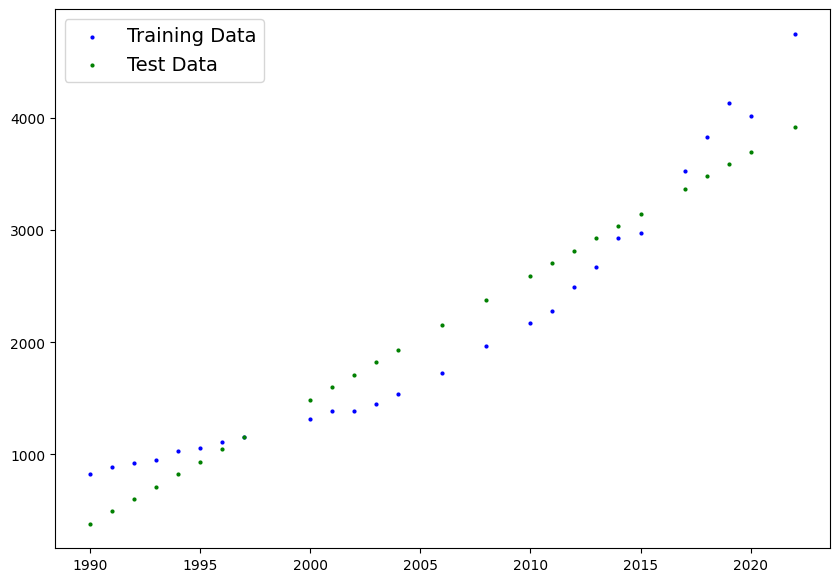

In [17]:
all_pred_data = linear_regression_model.predict(X_train)
print(X_train.shape, all_pred_data.shape)
plot_data(train_data=X_train, train_labels=y_train, test_data=X_train,test_labels=all_pred_data)